In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [135]:
import datetime

In [2]:
managed_cluster_df = pd.read_csv('./datasets/managed_clusters.csv')

In [4]:
hub_cluster_df = pd.read_csv('./datasets/hub_cluster.csv')

In [26]:
managed_cluster_df.shape, hub_cluster_df.shape

((3860, 1), (3180, 2))

In [ ]:
cpu_ts =  pd.read_csv('/Users/sponnur/PycharmProjects/pythonProject1/cpu_usage_2022_03_25_35_15m.csv')

In [9]:
cpu_ts.head()

,timestamp,cpu_usage,cluster_id
0,2022-03-25 19:30:00,23.985167,01d1e513-9210-4099-967f-6dc13a7b4cc4
1,2022-03-25 19:45:00,16.995161,01d1e513-9210-4099-967f-6dc13a7b4cc4
2,2022-03-25 20:00:00,31.195973,01d1e513-9210-4099-967f-6dc13a7b4cc4
3,2022-03-25 20:15:00,19.654904,01d1e513-9210-4099-967f-6dc13a7b4cc4
4,2022-03-25 20:30:00,18.065067,01d1e513-9210-4099-967f-6dc13a7b4cc4


Making the cluster_id as index in managed cluster to perform inner join on that column

In [8]:
managed_cluster_df.set_index('_id',inplace=True)

In [16]:
cpu_ts_managed = cpu_ts.join(managed_cluster_df,on='cluster_id',how='inner')

Making the cluster_id as index in hub cluster to perform inner join on that column

In [20]:
hub_cluster_df.set_index('_id',inplace=True)

In [21]:
cpu_ts_hub_cluster = cpu_ts.join(hub_cluster_df,on='cluster_id',how='inner')

In [22]:
cpu_ts_hub_cluster.head()

,timestamp,cpu_usage,cluster_id,vendor,is_managed
2721,2022-03-25 19:30:00,13.885238,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0
2722,2022-03-25 19:45:00,13.991905,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0
2723,2022-03-25 20:00:00,14.992952,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0
2724,2022-03-25 20:15:00,14.167333,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0
2725,2022-03-25 20:30:00,12.761905,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0


Unique vendors observed in hub cluster

In [24]:
cpu_ts_hub_cluster['vendor'].unique()

array(['OpenShift', 'OpenShiftDedicated', 'EKS', 'GKE', 'Other', 'IKS',
       'AKS'], dtype=object)

In [25]:
len(cpu_ts_hub_cluster['cluster_id'].unique())

3159

In [29]:
cpu_ts_hub_cluster['cluster_ts_size'] = cpu_ts_hub_cluster.groupby('cluster_id')['cluster_id'].transform('count')

The time series size of each cluster is inconsistent 

In [30]:
cpu_ts_hub_cluster['cluster_ts_size'].describe()

count    2.430255e+06
mean     2.671788e+03
std      1.069392e+03
min      1.000000e+00
25%      2.141000e+03
50%      3.376000e+03
75%      3.395000e+03
max      3.397000e+03
Name: cluster_ts_size, dtype: float64

Converting the type of timestamp from object to datetime object

In [33]:
cpu_ts_hub_cluster['timestamp'] =  pd.to_datetime(cpu_ts_hub_cluster.timestamp, infer_datetime_format=True)
cpu_ts_managed['timestamp'] = pd.to_datetime(cpu_ts_managed.timestamp, infer_datetime_format=True)

In [38]:
cpu_ts_hub_cluster['date'] = cpu_ts_hub_cluster['timestamp'].dt.date

In [51]:
cpu_ts_managed['date'] = cpu_ts_managed['timestamp'].dt.date

Dates of the current dataset are from 25th of March till 29th of May

In [242]:
cpu_ts_hub_cluster[cpu_ts_hub_cluster['timestamp'] == '2022-04-29 00:00:00']

,timestamp,cpu_usage,cluster_id,vendor,is_managed,cluster_ts_size,date,cluster_per_day_ts_size
76461256,2022-04-29,10.390172,001ce673-3b85-489f-a443-88df28830a56,OpenShift,0,3390,2022-04-29,79
76475986,2022-04-29,25.633029,01a754f2-8cdb-4f28-b2e1-8fe592d5c1e1,OpenShift,0,3395,2022-04-29,79
76477051,2022-04-29,8.628095,01ca0384-73e4-4948-a8d2-8f2e3629542b,OpenShift,0,3390,2022-04-29,79
76480729,2022-04-29,33.217635,02469314-0185-44e0-96c4-53a370b270e1,OpenShift,0,3394,2022-04-29,79
76484013,2022-04-29,6.109429,029099e1-c965-46a9-8af4-2a561b2e6f36,OpenShift,0,3382,2022-04-29,79
...,...,...,...,...,...,...,...,...
77314974,2022-04-29,8.665238,5e961335-5948-42d1-b03f-91ca62fbfda7,OpenShift,0,17,2022-04-29,1
77398656,2022-04-29,8.946571,67f78aa1-e804-417e-ba21-0bca766c63e1,OpenShift,0,14,2022-04-29,13
77849800,2022-04-29,5.733524,9a2caddc-14f7-4a2e-89ec-27c5044c7da6,OpenShift,0,89,2022-04-29,79
78201598,2022-04-29,4.094952,c1033ec7-ee63-4574-a49a-a16f0f4928d4,OpenShift,0,86,2022-04-29,79


calculating per day size of the timeseries to handle inconsistency

In [41]:
cpu_ts_hub_cluster['cluster_per_day_ts_size'] = cpu_ts_hub_cluster.groupby(['cluster_id','date'])['cluster_id'].transform('count')

In [46]:
cpu_ts_hub_cluster[cpu_ts_hub_cluster['cluster_id'] == '001ce673-3b85-489f-a443-88df28830a56'].cluster_per_day_ts_size.describe()

count    3390.000000
mean       96.019469
std         6.315094
min        18.000000
25%        97.000000
50%        97.000000
75%        97.000000
max        97.000000
Name: cluster_per_day_ts_size, dtype: float64

In [138]:
single_day_managed_cluster_df = cpu_ts_managed.loc[cpu_ts_managed['date'] == datetime.date(2022, 3, 26)]

In [145]:
single_day_managed_cluster_df.set_index('timestamp',inplace=True)

Single Day Time Series Plots of different clusters 

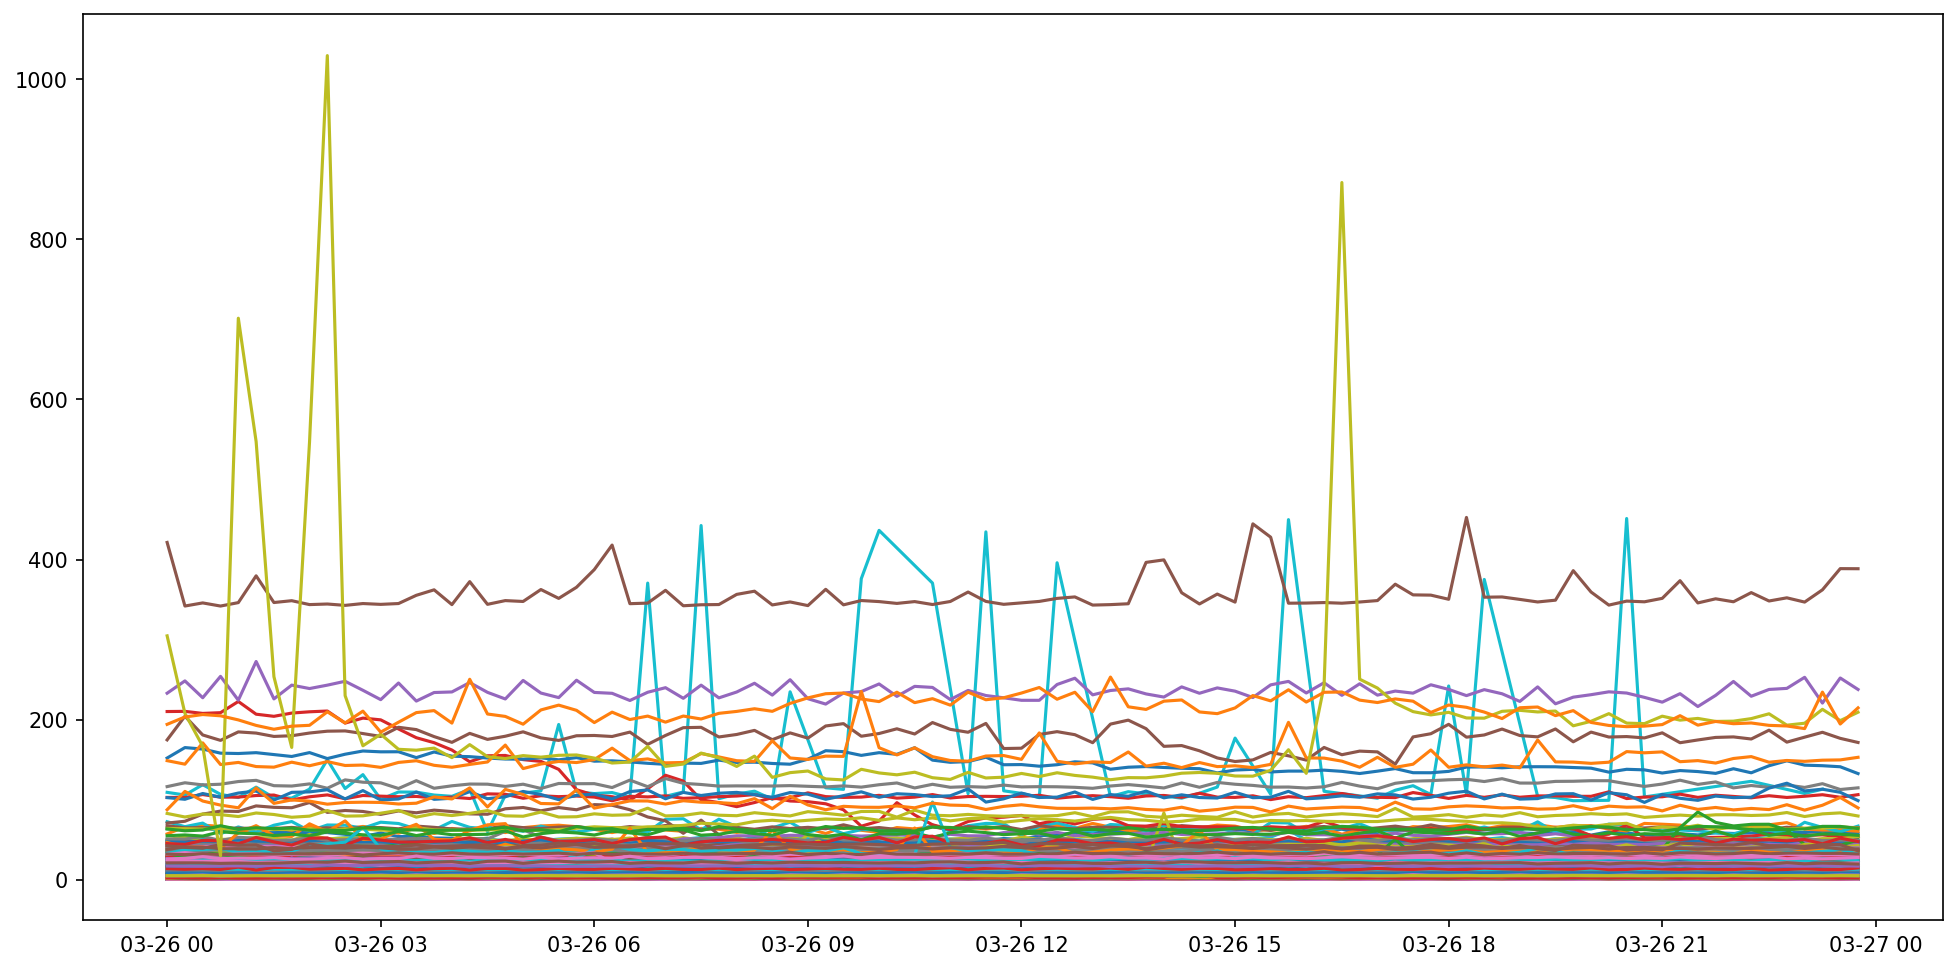

In [146]:
plt.figure(figsize=(16, 8), dpi=150)
for cluster_id, df in single_day_managed_cluster_df.groupby('cluster_id'):
    plt.plot(df['cpu_usage'],label='line')
plt.show()

In [470]:
single_cluster_df = cpu_ts_managed.loc[cpu_ts_managed['cluster_id'] == '00074511-2e63-4d75-9937-3495d5595b4f']

In [211]:
from impyute.imputation.cs import mice
from impyute.imputation.ts import locf
from impyute.imputation.ts import moving_window
from numpy import nan

In [196]:
a = [[1.0,2.0,np.nan]]
a = np.array(a)

In [322]:
b = [[-1.24940, -1.38673, -0.03214945, 0.08255145, -0.007415],
[ 2.14662, 0.32758 , -0.82601414, 1.78124027, 0.873998], [1.0,nan,1.0,2.0, 1.680435], [ 0.40975, 1.067599, 0.29152388, -1.70160145, -0.565226], [nan, nan, 2.04004377, 0.16664863, -0.010677]]
b = np.array(b)

In [313]:
c = [[nan, nan, -0.03214945, nan, -0.007415]]
c = np.array(c)

In [326]:
c_result = locf(b,axis=0)

In [324]:
moving_window(b,wsize=3)

array([[-1.2494    , -1.38673   , -0.03214945,  0.08255145, -0.007415  ],
       [ 2.14662   ,  0.32758   , -0.82601414,  1.78124027,  0.873998  ],
       [ 1.        ,  1.        ,  1.        ,  2.        ,  1.680435  ],
       [ 0.40975   ,  1.067599  ,  0.29152388, -1.70160145, -0.565226  ],
       [ 2.04004377,  2.04004377,  2.04004377,  0.16664863, -0.010677  ]])

In [308]:
test_array = cpu_ts_hub_cluster.loc[cpu_ts_hub_cluster['cluster_id'] == '001ce673-3b85-489f-a443-88df28830a56']['cpu_usage'].to_list()

In [74]:
from scipy.stats import kurtosistest

In [86]:
kurtosistest(test_array)

KurtosistestResult(statistic=29.91934823204776, pvalue=1.102486609867157e-196)

In [76]:
from scipy.stats import kurtosis

In [92]:
kurtosis([0,1,2])

-1.5

In [ ]:
cpu_ts_hub_cluster[cpu_ts_hub_cluster['cluster_id'] == '001ce673-3b85-489f-a443-88df28830a56'].groupby('cluster_id').rolling('D').avg()

In [99]:
new_df = cpu_ts_managed.copy(deep=True)

In [100]:
new_df.set_index('timestamp',inplace=True)

In [107]:
new_df[new_df['cluster_id'] == '001ce673-3b85-489f-a443-88df28830a56'].groupby('cluster_id')['cpu_usage'].rolling('D').sum()

Series([], Name: cpu_usage, dtype: float64)

Infering the Dates

In [114]:
new_df['date'] = pd.to_datetime(new_df['date'], format='%Y-%m-%d')

Generating all the indexes that we need between our date range

In [349]:
indexes = pd.date_range('2022-03-26 00:00:00','2022-04-30 00:00:00',freq='15T')

In [351]:
indexes = indexes[:-1]

In [277]:
len(indexes)

3360

Since we have 35 days worth of data, we should have 35 * 96 a total of 3360 indexes per day

In [279]:
35*96

3360

In [425]:
from pandas.core.tools.datetimes import _guess_datetime_format_for_array

In [428]:
_guess_datetime_format_for_array(['2022-03-25 19:30:00'])

'%Y-%m-%d %H:%M:%S'

Inferring the date format

In [462]:
indexes_df = pd.DataFrame(indexes,columns=['timestamp'])

Testing Logic with a single cluster

In [473]:
single_cluster_df = single_cluster_df.drop_duplicates(['timestamp'],keep='first')

In [474]:
len(single_cluster_df.timestamp.unique())

2537

In [475]:
single_cluster_df.shape

(2537, 5)

In [476]:
len(single_cluster_df.index.unique())

2537

In [478]:
single_cluster_df.set_index('timestamp',inplace=True)

In [454]:
single_cluster_df[single_cluster_df['cpu_usage'].notnull()].shape

(2537, 4)

Since the indexes start from March 26th we are dropping March 25th day Records, that is why we observe inconsistency

In [500]:
joined_df = indexes_df.join(single_cluster_df,on='timestamp',how='left')[['cpu_usage']]

In [483]:
joined_df[joined_df['cpu_usage'].isnull()].shape

(841, 3)

In [501]:
new_np = joined_df.to_numpy().reshape(1,3360)

In [502]:
cluster_metrics = np.empty(shape=(0,3360))

In [503]:
cluster_metrics = np.concatenate([cluster_metrics,new_np],axis=0)

In [504]:
cluster_metrics.shape

(1, 3360)

In [508]:
c_result = locf(cluster_metrics,axis=0).reshape(1,3360)

In [525]:
c_result2 = moving_window(cluster_metrics,nindex=1,wsize=21).reshape(1,3360)

In [531]:
cluster_metrics.reshape(-1,1).shape

(3360, 1)

1.22.4


In [536]:
import numpy as np

In [ ]:
g = df_copy.groupby('cluster_id').cumcount()
L = (df_copy.set_index(['cluster_id',g])
       .unstack(fill_value=0)
       .stack().groupby(level=0)
       .apply(lambda x: x.values.tolist())
       .tolist())

In [278]:
# Total Avg of Cpu
# Min of the cluster cpu usage
# Max of the cluster cpu usage
# Top 5 Min AVG cpu usage
# Top 5 Max AVG cpu usage

In [ ]:
def generate_features(current_list):
    #print(current_list)
    current_list.sort()
    metric_max = max(current_list)
    metric_min = min(current_list)
    metric_avg = sum(current_list)/len(current_list)
    top_5_max_avg = sum(current_list[:5])/5
    top_5_min_avg = sum(current_list[-5:])/5
    min_max_diff = metric_max - metric_min
    min_max_5_diff = top_5_max_avg - top_5_min_avg
    #print(metric_max, metric_min, metric_avg, top_5_max_avg, top_5_min_avg, min_max_diff, min_max_5_diff)
    return [ metric_max, metric_min, metric_avg, top_5_max_avg, top_5_min_avg, min_max_diff, min_max_5_diff]

In [ ]:
#single day avg
single = {}
for cluster_id, current_df1 in single_cluster_df.groupby('cluster_id'):
    for date, current_df2 in current_df1.groupby('date'):
        current_list = current_df2['cpu_usage'].to_list()
        metric_avg = sum(current_list)/len(current_list)
        single[date] = metric_avg
    break
        #features_generated = []
        #features_generated.extend(generate_features(current_list))
        #new_list.append(features_generated)
    #print(cluster_id, count)
#new_df = pd.DataFrame(new_list,columns=['metric_max', 'metric_min', 'metric_avg', 'top_5_max_avg',
                                        #'top_5_min_avg', 'min_max_diff', 'min_max_5_diff'])


In [ ]:
#14 day avg

In [ ]:
#all_days avg
new_list = []
resampled_df = sample_cluster_df.sample(100)
for cluster_id, current_df1 in sample_cluster_df.groupby('cluster_id'):
        #print(cluster_id,current_df1.head())
        current_list = current_df1['cpu_usage'].to_list()
        features_generated = [cluster_id]
        features_generated.extend(generate_features(current_list))
        new_list.append(features_generated)
new_df2 = pd.DataFrame(new_list,columns=['cluster_id','all_metric_max', 'all_metric_min', 'all_metric_avg', 
                                         'all_top_5_max_avg', 'all_top_5_min_avg', 'all_min_max_diff', 'all_min_max_5_diff'])